# Ahmed et al.

### define process data function

In [14]:
def compare_brine_concentrations(dataframe, raw_data, export_path, elemental_masses, literature_cf):
    from chempy.properties.water_density_tanaka_2001 import water_density
    from sigfig import round
    from scipy.constants import milli
    from matplotlib import pyplot
    import matplotlib

    pandas.set_option('max_columns', None)
    print('raw_data')
    display(raw_data)
    print('processed_data')
    display(dataframe)

    
    # final effluent concentrations
    final_cf = raw_data['mass_H2O'].iloc[0] / raw_data['mass_H2O'].iloc[-1]
    last_row = dataframe.iloc[-1]

    # feed concentrations
    water_density = water_density() * milli
    custom_water_parameters = {
        'element': {
            'Ca': {
                'concentration (ppm)':0.21/milli,
                'reference': ''
            },
            'Mg': {
                'concentration (ppm)':0.1/milli,
                'reference':''
            },
            'Na': {
                'concentration (ppm)':109.04/milli,
                'reference':''
            },
            'Sr': {
                'concentration (ppm)':0.044/milli,
                'reference':''
            },
            'Cl': {
                'concentration (ppm)':72.73/milli,
                'reference':''
            },
            'S(6)': {
                'concentration (ppm)':0.375/milli,
                'reference':''
            },
            'Ba': {
                'concentration (ppm)':0.019/milli,
                'reference':''
            },
            'B': {
                'concentration (ppm)':0.27/milli,
                'reference':''
            },
            'K': {
                'concentration (ppm)':0.37/milli,
                'reference':''
            }
        },
        'pH': {
            'value': 9.125,
            'reference': ''
        }
    }

    molals = {}
    for element in custom_water_parameters['element']:
        original_element = element
        element = re.sub('((?:\(\d\)))', '', element)
        mass = elemental_masses[element] 
        ppm_conc = custom_water_parameters['element'][original_element]['concentration (ppm)'] * milli
        molal_conc = ppm_conc / water_density / mass
        molals[original_element] = float(molal_conc)

    print('literature_cf', literature_cf)
    print('final_cf', final_cf)
    
    # final effluent CF for each element
    cfs = {}
    diff_list = []
    labels = []
    for element, final_conc in last_row.iteritems():
        element = re.search('([A-Z][a-z]?(?:\(\d\))?(?=\(mol\/kgw\)))', element).group()
        cfs[element] = {}
        initial_conc = molals[element]
        cfs[element]['cf'] = float(final_conc) / initial_conc

        if element in literature_final_concentrations:
            diff = (cfs[element]['cf'] / literature_final_concentrations[element] * 100) - 100
            labels.append(element)
            diff_list.append(diff)
            cfs[element]['% diff'] = diff

    # define a bar graph of CF error 
    labels.append('total')
    total_cf_error = (final_cf / literature_cf * 100) - 100
    diff_list.append(total_cf_error)
    min_diff = min(diff_list) - 5
    max_diff = max(diff_list) + 5

    pyplot.rcParams['figure.figsize'] = (12, 9)
    pyplot.rcParams['figure.dpi'] = 100
    figure, ax = pyplot.subplots()
    bar_graph = ax.bar(labels, diff_list)
    ax.axhline(0, color='grey', linewidth=0.8)
    ax.set_ylabel('% difference')
    ax.set_ylim(min_diff, max_diff)
    ax.set_xlabel('Element')
    ax.set_title('Elemental difference of ROSSpy from Zaman et al.')
    diff_list = [round(value, 2, notation = 'sci') for value in diff_list]
    ax.bar_label(bar_graph, diff_list)
    figure.savefig(export_path)

## Execute multiple modules through all_time





Estimated completion in 5.00E1 seconds by 2021-11-04 00:51:59.622466 local time.


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 3 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


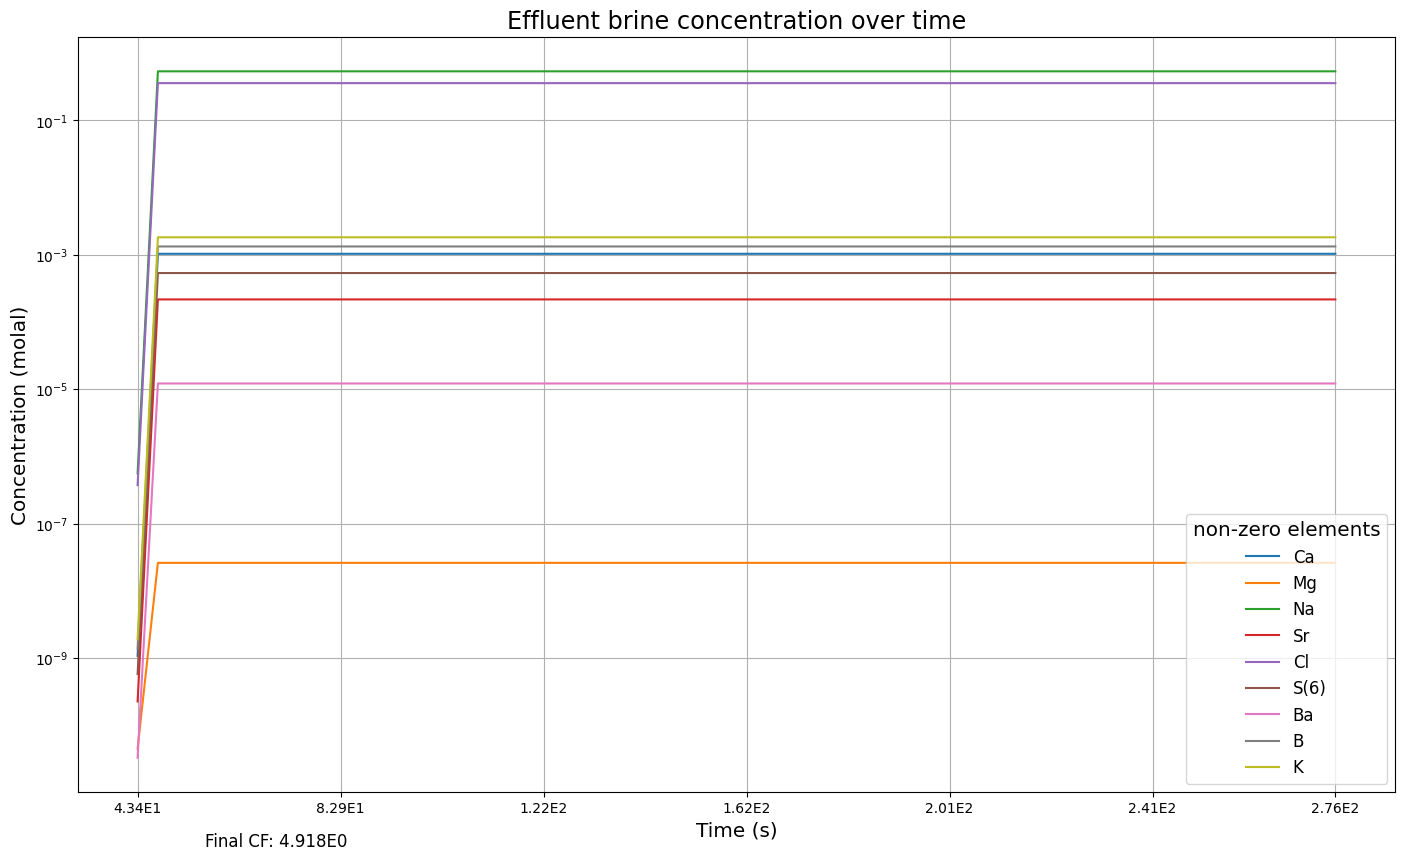

raw_data


sim   state  soln    dist_x        time  step         pH   pe   reaction  \
3     1  transp    12  0.973667    0.000000     0   7.000000  4.0  13.711624   
4     1  transp    12  0.973667    3.946330     1   7.000040  4.0  13.711624   
5     1  transp    12  0.973667    7.892659     2   7.000087  4.0  13.711624   
6     1  transp    12  0.973667   11.838989     3   7.000146  4.0  13.711624   
7     1  transp    12  0.973667   15.785319     4   7.000218  4.0  13.711624   
..  ...     ...   ...       ...         ...   ...        ...  ...        ...   
69    1  transp    12  0.973667  260.457760    66  13.061731  4.0  13.711624   
70    1  transp    12  0.973667  264.404090    67  13.061731  4.0  13.711624   
71    1  transp    12  0.973667  268.350420    68  13.061731  4.0  13.711624   
72    1  transp    12  0.973667  272.296750    69  13.061731  4.0  13.711624   
73    1  transp    12  0.973667  276.243079    70  13.061731  4.0  13.711624   

    temp(C)   mass_H2O  Ca(mol/kgw)   Mg(mol/kgw)  Na(mol/kgw)  Sr(mol/kgw)  \
3      25.0  17.378154     0.000000  0.000000e+00     0.000000     0.000000   
4      25.0  17.118432     0.000000  0.000000e+00     0.000000     0.000000   
5      25.0  16.817451     0.000000  0.000000e+00     0.000000     0.000000   
6      25.0  16.464511     0.000000  0.000000e+00     0.000000     0.000000   
7      25.0  16.044856     0.000000  0.000000e+00     0.000000     0.000000   
..      ...        ...          ...           ...          ...          ...   
69     25.0   3.533466     0.001038  2.615485e-08     0.539042     0.000218   
70     25.0   3.533466     0.001038  2.615485e-08     0.539042     0.000218   
71     25.0   3.533466     0.001038  2.615485e-08     0.539042     0.000218   
72     25.0   3.533466     0.001038  2.615485e-08     0.539042     0.000218   
73     25.0   3.533466     0.001038  2.615485e-08     0.539042     0.000218   

    Cl(mol/kgw)  S(6)(mol/kgw)  Ba(mol/kgw)  B(mol/kgw)  K(mol/kgw)  \
3      0.000000       0.000000     0.000000    0.000000    0.000000   
4      0.000000       0.000000     0.000000    0.000000    0.000000   
5      0.000000       0.000000     0.000000    0.000000    0.000000   
6      0.000000       0.000000     0.000000    0.000000    0.000000   
7      0.000000       0.000000     0.000000    0.000000    0.000000   
..          ...            ...          ...         ...         ...   
69     0.359543       0.000537     0.000012    0.001335    0.001829   
70     0.359543       0.000537     0.000012    0.001335    0.001829   
71     0.359543       0.000537     0.000012    0.001335    0.001829   
72     0.359543       0.000537     0.000012    0.001335    0.001829   
73     0.359543       0.000537     0.000012    0.001335    0.001829   

    Anhydrite  d_Anhydrite  Aragonite  d_Aragonite  Arcanite  d_Arcanite  \
3         0.0          0.0        0.0          0.0       0.0         0.0   
4         0.0          0.0        0.0          0.0       0.0         0.0   
5         0.0          0.0        0.0          0.0       0.0         0.0   
6         0.0          0.0        0.0          0.0       0.0         0.0   
7         0.0          0.0        0.0          0.0       0.0         0.0   
..        ...          ...        ...          ...       ...         ...   
69        0.0          0.0        0.0          0.0       0.0         0.0   
70        0.0          0.0        0.0          0.0       0.0         0.0   
71        0.0          0.0        0.0          0.0       0.0         0.0   
72        0.0          0.0        0.0          0.0       0.0         0.0   
73        0.0          0.0        0.0          0.0       0.0         0.0   

    Artinite  d_Artinite    Barite  d_Barite  Bischofite  d_Bischofite  \
3        0.0         0.0  0.000000  0.000000         0.0           0.0   
4        0.0         0.0  0.000000  0.000000         0.0           0.0   
5        0.0         0.0  0.000000  0.000000         0.0           0.0   
6        0.0         0.0  0.0000

processed_data


Ca(mol/kgw) Mg(mol/kgw) Na(mol/kgw) Sr(mol/kgw) Cl(mol/kgw)  \
Time (s)                                                               
4.34E1      1.080E-9   4.487E-11    5.610E-7   2.264E-10    3.742E-7   
4.74E1      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
5.13E1      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
5.52E1      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
5.92E1      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
6.31E1      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
6.71E1      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
7.10E1      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
7.50E1      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
7.89E1      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
8.29E1      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
8.68E1      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
9.08E1      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
9.47E1      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
9.87E1      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.03E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.07E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.10E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.14E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.18E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.22E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.26E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.30E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.34E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.38E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.42E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.46E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.50E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.54E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.58E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.62E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.66E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.70E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.74E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.78E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.82E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.85E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.89E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.93E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
1.97E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
2.01E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
2.05E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
2.09E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
2.13E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
2.17E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
2.21E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
2.25E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
2.29E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
2.33E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
2.37E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
2.41E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
2.45E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
2.49E2      1.038E-3    2.615E-8    5.390E-1    2.175E-4    3.595E-1   
2.53E2      1.038E-3    2.615E-8    5.390E-1    2

literature_cf 5.034383384486786
final_cf 4.918160726588332


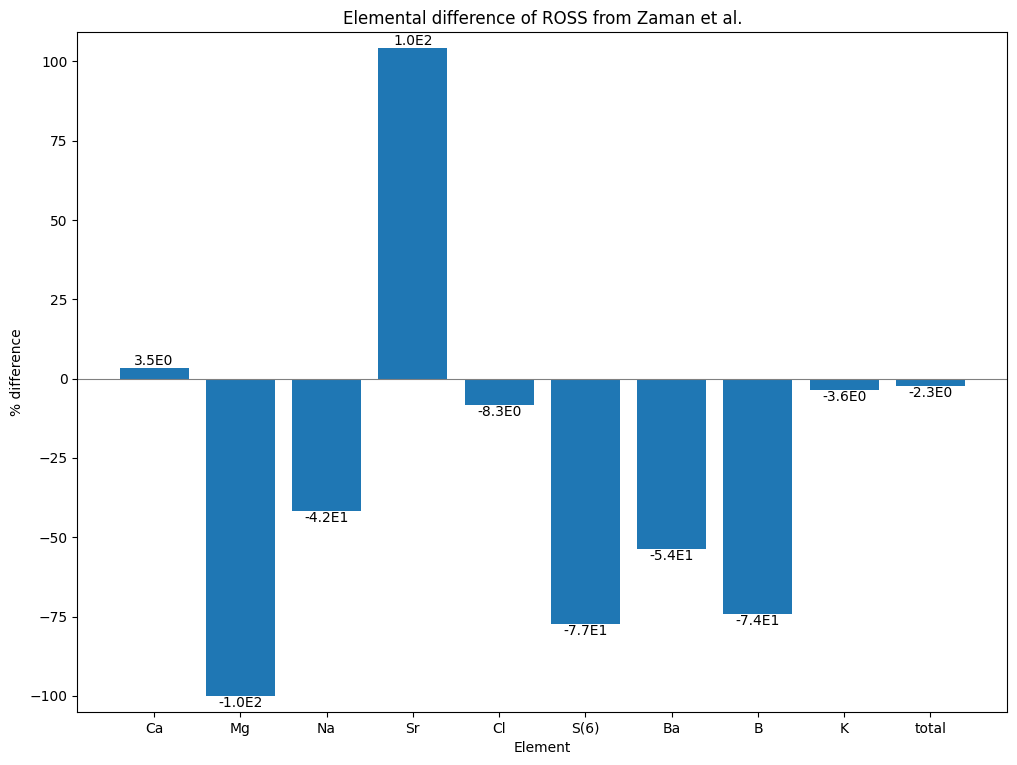

In [15]:
from scipy.constants import nano, milli, day, hour
from chemicals import periodic_table
import os

elemental_masses = {}
for element in periodic_table:
    elemental_masses[element.symbol] = element.MW
    
def average(some_list):
    return sum(some_list)/ len(some_list)

# run the ROSS model
%run ../../../rosspy/core.py
ross = ROSSPkg()

# water parameters
solution_description = 'Zaman'
custom_water_parameters = {
    'element': {
        'Ca': {
            'concentration (ppm)':0.21*elemental_masses['Ca'],
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':0.1*elemental_masses['Mg'],
            'reference':''
        },
        'Na': {
            'concentration (ppm)':109.04*elemental_masses['Na'],
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':0.044*elemental_masses['Sr'],
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':72.73*elemental_masses['Cl'],
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':0.375*elemental_masses['S'],
            'reference':''
        },
        'Ba': {
            'concentration (ppm)':0.019*elemental_masses['Ba'],
            'reference':''
        },
        'B': {
            'concentration (ppm)':0.27*elemental_masses['B'],
            'reference':''
        },
        'K': {
            'concentration (ppm)':0.37*elemental_masses['K'],
            'reference':''
        }
    },
    'pH': {
        'value': 9.125,
        'reference': ''
    }
}

# literature final effluent concentrations 
literature_final_concentrations = {
    'Ca': 0.21/1.1,
    'Mg': 0.1/0.49,
    'Na': 109.04/561.44,
    'Sr': 0.044/0.208,
    'Ba': 0.019/0.1,
    'B': 0.27/1.31,
    'Cl': 72.73/381.6,
    'K': 0.37/1.85,
    'S(6)': 0.375/1.85
}
literature_cf = average([(1/literature_final_concentrations[element]) for element in literature_final_concentrations])

# general parameters
database_selection = 'pitzer'
simulation_title = 'test'
simulation = 'brine'
permeate_approach = 'linear_cf'
water_selection = ''
simulation_perspective = 'all_time'
simulation_time = 275


# create the input file
ross.define_general(database_selection, simulation)
ross.transport(simulation_time, simulation_perspective, )
ross.reaction(permeate_approach, final_cf = literature_cf)
ross.solutions(water_selection, custom_water_parameters, solution_description)
ross.equilibrium_phases()
ross.selected_output()
ross.export()

# execute and process the input file
raw_data1 = ross.execute()
multi_module_data = ross.process_selected_output()

# process and export the data
export_path = os.path.join(ross.simulation_path, 'Zaman_comparison.png')
compare_brine_concentrations(multi_module_data, raw_data1, export_path, elemental_masses, literature_cf)

## Execute a single module over all_time

C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 3 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))



Estimated completion in 3.20E1 seconds by 2021-10-27 23:26:17.085772 local time.


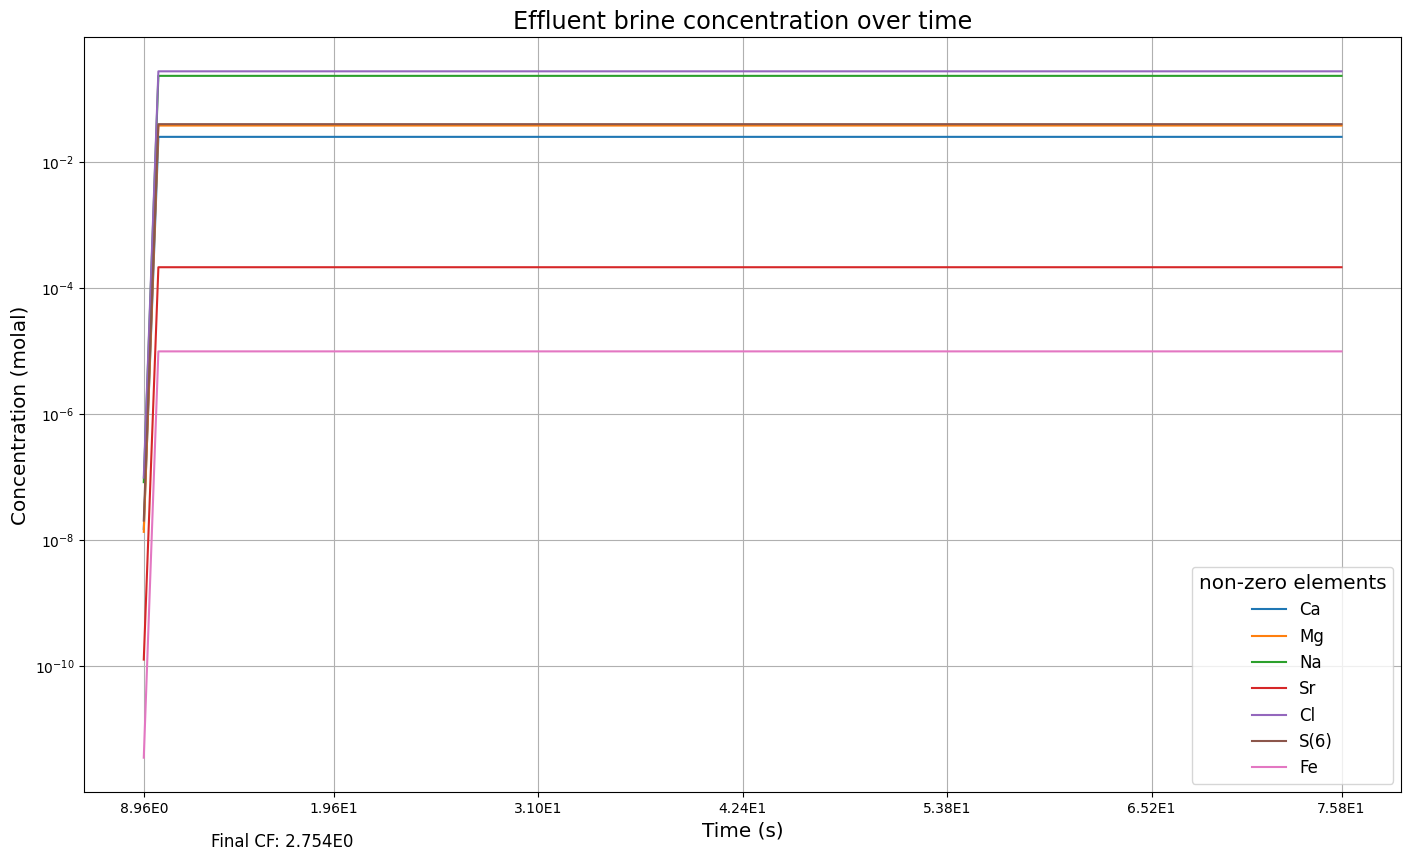

raw_data


sim   state  soln    dist_x       time  step        pH   pe   reaction  \
3     1  transp    12  0.973667   0.000000     0  7.000000  4.0  48.943253   
4     1  transp    12  0.973667   0.814891     1  7.000141  4.0  48.943253   
5     1  transp    12  0.973667   1.629783     2  7.000300  4.0  48.943253   
6     1  transp    12  0.973667   2.444674     3  7.000481  4.0  48.943253   
7     1  transp    12  0.973667   3.259566     4  7.000689  4.0  48.943253   
..  ...     ...   ...       ...        ...   ...       ...  ...        ...   
92    1  transp    12  0.973667  72.525340    89  6.975001  4.0  48.943253   
93    1  transp    12  0.973667  73.340231    90  6.975001  4.0  48.943253   
94    1  transp    12  0.973667  74.155123    91  6.975001  4.0  48.943253   
95    1  transp    12  0.973667  74.970014    92  6.975001  4.0  48.943253   
96    1  transp    12  0.973667  75.784906    93  6.975001  4.0  48.943253   

    temp(C)   mass_H2O  Ca(mol/kgw)  Mg(mol/kgw)  Na(mol/kgw)  Sr(mol/kgw)  \
3      25.0  17.378154     0.000000     0.000000     0.000000     0.000000   
4      25.0  16.492481     0.000000     0.000000     0.000000     0.000000   
5      25.0  15.595075     0.000000     0.000000     0.000000     0.000000   
6      25.0  14.685935     0.000000     0.000000     0.000000     0.000000   
7      25.0  13.765062     0.000000     0.000000     0.000000     0.000000   
..      ...        ...          ...          ...          ...          ...   
92     25.0   6.310946     0.025339     0.038292     0.235643     0.000216   
93     25.0   6.310946     0.025339     0.038292     0.235643     0.000216   
94     25.0   6.310946     0.025339     0.038292     0.235643     0.000216   
95     25.0   6.310946     0.025339     0.038292     0.235643     0.000216   
96     25.0   6.310946     0.025339     0.038292     0.235643     0.000216   

    Cl(mol/kgw)  S(6)(mol/kgw)  Fe(mol/kgw)  Anhydrite  d_Anhydrite  \
3      0.000000       0.000000      0.00000        0.0          0.0   
4      0.000000       0.000000      0.00000        0.0          0.0   
5      0.000000       0.000000      0.00000        0.0          0.0   
6      0.000000       0.000000      0.00000        0.0          0.0   
7      0.000000       0.000000      0.00000        0.0          0.0   
..          ...            ...          ...        ...          ...   
92     0.278183       0.040305      0.00001        0.0          0.0   
93     0.278183       0.040305      0.00001        0.0          0.0   
94     0.278183       0.040305      0.00001        0.0          0.0   
95     0.278183       0.040305      0.00001        0.0          0.0   
96     0.278183       0.040305      0.00001        0.0          0.0   

    Aragonite  d_Aragonite  Artinite  d_Artinite  Bischofite  d_Bischofite  \
3         0.0          0.0       0.0         0.0         0.0           0.0   
4         0.0          0.0       0.0         0.0         0.0           0.0   
5         0.0          0.0       0.0         0.0         0.0           0.0   
6         0.0          0.0       0.0         0.0         0.0           0.0   
7         0.0          0.0       0.0         0.0         0.0           0.0   
..        ...          ...       ...         ...         ...           ...   
92        0.0          0.0       0.0         0.0         0.0           0.0   
93        0.0          0.0       0.0         0.0         0.0           0.0   
94        0.0          0.0       0.0         0.0         0.0           0.0   
95        0.0          0.0       0.0         0.0         0.0           0.0   
96        0.0          0.0       0.0         0.0         0.0           0.0   

    Bloedite  d_Bloedite  Brucite  d_Brucite  Burkeite  d_Burkeite  Calcite  \
3        0.0         0.0      0.0        0.0       0.0         0.0      0.0   
4        0.0         0.0      0.0        0.0       0.0         0.0      0.0   
5        0.0         0.0      0.0        0.0       0.0         0.0      0.0   
6        0.0         0.0

processed_data


Ca(mol/kgw) Mg(mol/kgw) Na(mol/kgw) Sr(mol/kgw) Cl(mol/kgw)  \
Time (s)                                                               
8.96E0      1.512E-8    1.356E-8    8.343E-8   1.271E-10    9.850E-8   
9.78E0      2.534E-2    3.829E-2    2.356E-1    2.157E-4    2.782E-1   
1.06E1      2.534E-2    3.829E-2    2.356E-1    2.157E-4    2.782E-1   
1.14E1      2.534E-2    3.829E-2    2.356E-1    2.157E-4    2.782E-1   
1.22E1      2.534E-2    3.829E-2    2.356E-1    2.157E-4    2.782E-1   
...              ...         ...         ...         ...         ...   
7.25E1      2.534E-2    3.829E-2    2.356E-1    2.157E-4    2.782E-1   
7.33E1      2.534E-2    3.829E-2    2.356E-1    2.157E-4    2.782E-1   
7.42E1      2.534E-2    3.829E-2    2.356E-1    2.157E-4    2.782E-1   
7.50E1      2.534E-2    3.829E-2    2.356E-1    2.157E-4    2.782E-1   
7.58E1      2.534E-2    3.829E-2    2.356E-1    2.157E-4    2.782E-1   

         S(6)(mol/kgw) Fe(mol/kgw)  
Time (s)                            
8.96E0        2.047E-8   3.523E-12  
9.78E0        4.031E-2    9.949E-6  
1.06E1        4.031E-2    9.949E-6  
1.14E1        4.031E-2    9.949E-6  
1.22E1        4.031E-2    9.949E-6  
...                ...         ...  
7.25E1        4.031E-2    9.949E-6  
7.33E1        4.031E-2    9.949E-6  
7.42E1        4.031E-2    9.949E-6  
7.50E1        4.031E-2    9.949E-6  
7.58E1        4.031E-2    9.949E-6  

[83 rows x 7 columns]

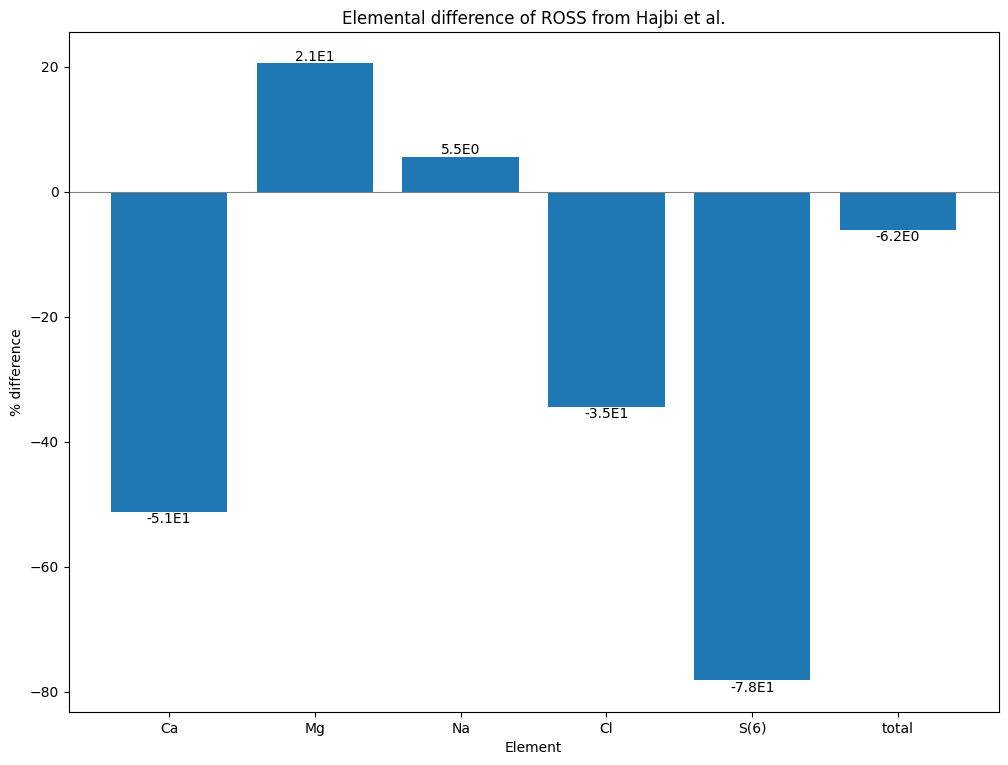

In [5]:
from scipy.constants import nano, milli, day, hour

# run the ROSS model
%run ../../rosspy/core.py
ross = ROSSPkg()

# module parameters
quantity_of_modules = 1
module_characteristics = {        
    'permeate_flow_m3_per_day': 1200 / quantity_of_modules,
    'max_feed_flow_m3_per_hour': 1848 / (day/hour),
}

# water parameters
solution_description = 'Hajbi'
custom_water_parameters = {
    'element': {
        'Ca': {
            'concentration (ppm)':720,
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':335,
            'reference':''
        },
        'Na': {
            'concentration (ppm)':1950,
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':13,
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':3550,
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':2250,
            'reference':''
        },
        'Fe': {
            'concentration (ppm)':0.2,
            'reference':''
        }
    }
}

# general parameters
database_selection = 'pitzer'
simulation_title = 'test'
simulation = 'brine'
water_selection = ''
simulation_perspective = 'all_time'
simulation_time = 75

# create the input file
ross.define_general(database_selection, simulation, quantity_of_modules = quantity_of_modules)
ross.transport(simulation_time, simulation_perspective, module_characteristics, )
ross.reaction()
ross.solutions(water_selection, custom_water_parameters, solution_description)
ross.equilibrium_phases()
ross.selected_output()
ross.export()

# execute the input file
raw_data2 = ross.execute()
single_module_data1 = ross.process_selected_output()

# process and export the data
export_path = os.path.join(ross.simulation_path, 'Hajbi_comparison.png')
compare_brine_concentrations(single_module_data1, raw_data2, export_path)

## Execute a single module over all_distance

C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 3 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))



Estimated completion in 3.20E1 seconds by 2021-10-27 23:26:24.534179 local time.


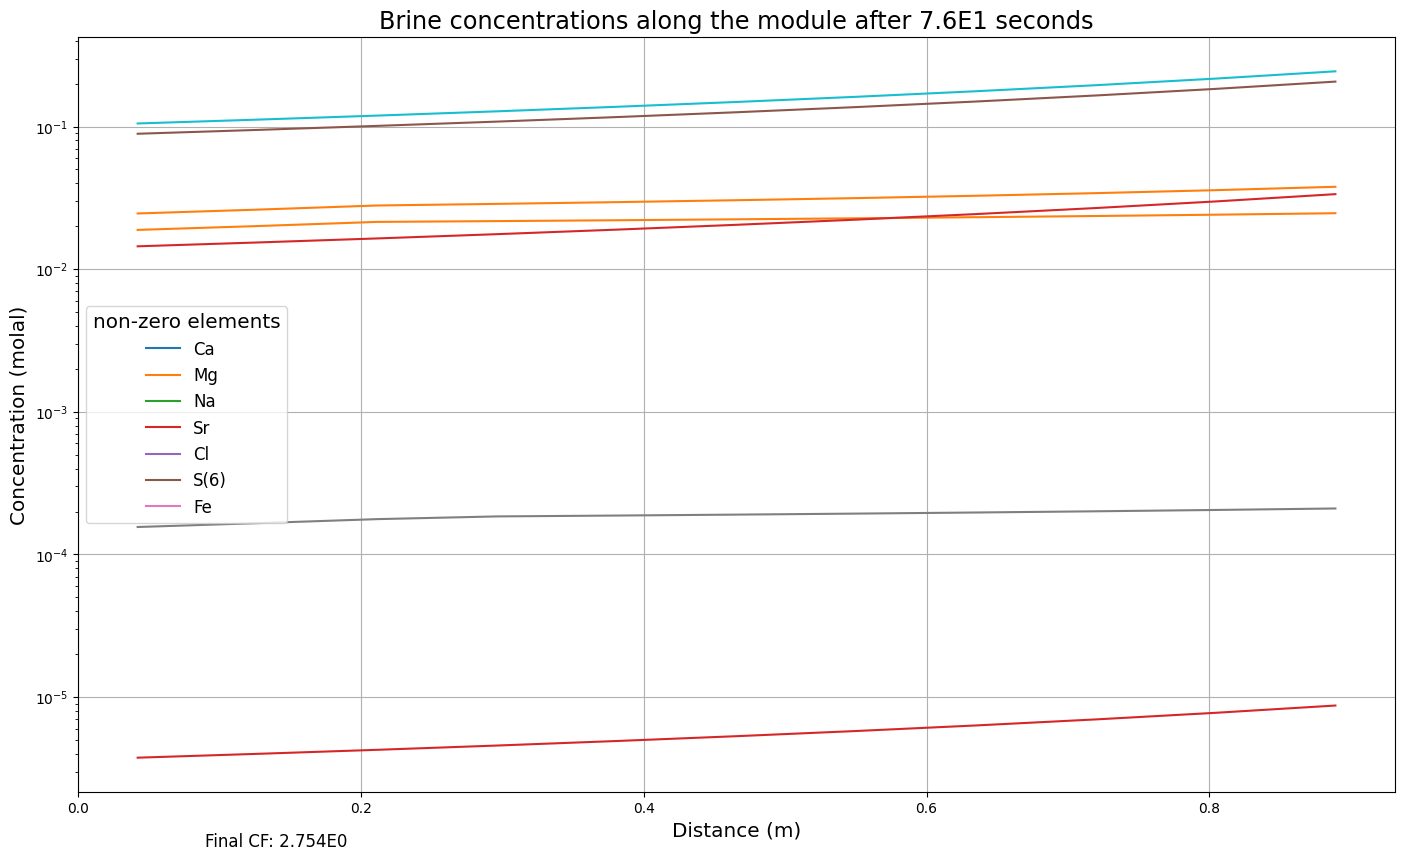

raw_data


sim   state  soln    dist_x       time  step        pH   pe   reaction  \
3     1  transp     1  0.042333   0.000000     0  7.000000  4.0  56.107275   
4     1  transp     2  0.127000   0.000000     0  7.000000  4.0  55.456000   
5     1  transp     3  0.211667   0.000000     0  7.000000  4.0  54.804725   
6     1  transp     4  0.296333   0.000000     0  7.000000  4.0  54.153451   
7     1  transp     5  0.381000   0.000000     0  7.000000  4.0  53.502176   
8     1  transp     6  0.465667   0.000000     0  7.000000  4.0  52.850901   
9     1  transp     7  0.550333   0.000000     0  7.000000  4.0  52.199627   
10    1  transp     8  0.635000   0.000000     0  7.000000  4.0  51.548352   
11    1  transp     9  0.719667   0.000000     0  7.000000  4.0  50.897077   
12    1  transp    10  0.804333   0.000000     0  7.000000  4.0  50.245803   
13    1  transp    11  0.889000   0.000000     0  7.000000  4.0  49.594528   
14    1  transp    12  0.973667   0.000000     0  7.000000  4.0  48.943253   
15    1  transp     1  0.042333  75.784906    93  6.999914  4.0  56.107275   
16    1  transp     2  0.127000  75.784906    93  6.999756  4.0  55.456000   
17    1  transp     3  0.211667  75.784906    93  6.999614  4.0  54.804725   
18    1  transp     4  0.296333  75.784906    93  6.997715  4.0  54.153451   
19    1  transp     5  0.381000  75.784906    93  6.995674  4.0  53.502176   
20    1  transp     6  0.465667  75.784906    93  6.993482  4.0  52.850901   
21    1  transp     7  0.550333  75.784906    93  6.991113  4.0  52.199627   
22    1  transp     8  0.635000  75.784906    93  6.988539  4.0  51.548352   
23    1  transp     9  0.719667  75.784906    93  6.985715  4.0  50.897077   
24    1  transp    10  0.804333  75.784906    93  6.982585  4.0  50.245803   
25    1  transp    11  0.889000  75.784906    93  6.979060  4.0  49.594528   
26    1  transp    12  0.973667  75.784906    93  6.975001  4.0  48.943253   

    temp(C)   mass_H2O  Ca(mol/kgw)  Mg(mol/kgw)  Na(mol/kgw)  Sr(mol/kgw)  \
3      25.0  17.378154     0.000000     0.000000     0.000000     0.000000   
4      25.0  17.378154     0.000000     0.000000     0.000000     0.000000   
5      25.0  17.378154     0.000000     0.000000     0.000000     0.000000   
6      25.0  17.378154     0.000000     0.000000     0.000000     0.000000   
7      25.0  17.378154     0.000000     0.000000     0.000000     0.000000   
8      25.0  17.378154     0.000000     0.000000     0.000000     0.000000   
9      25.0  17.378154     0.000000     0.000000     0.000000     0.000000   
10     25.0  17.378154     0.000000     0.000000     0.000000     0.000000   
11     25.0  17.378154     0.000000     0.000000     0.000000     0.000000   
12     25.0  17.378154     0.000000     0.000000     0.000000     0.000000   
13     25.0  17.378154     0.000000     0.000000     0.000000     0.000000   
14     25.0  17.378154     0.000000     0.000000     0.000000     0.000000   
15     25.0  16.704268     0.018855     0.014467     0.089027     0.000156   
16     25.0  15.701261     0.020060     0.015391     0.094714     0.000166   
17     25.0  14.710011     0.021454     0.016428     0.101097     0.000177   
18     25.0  13.729851     0.021732     0.017601     0.108314     0.000185   
19     25.0  12.761426     0.022036     0.018937     0.116533     0.000187   
20     25.0  11.804735     0.022369     0.020471     0.125978     0.000190   
21     25.0  10.859778     0.022736     0.022252     0.136940     0.000193   
22     25.0   9.926552     0.023142     0.024345     0.149814     0.000197   
23     25.0   9.005058     0.023595     0.026836     0.165144     0.000201   
24     25.0   8.095293     0.024103     0.029852     0.183703     0.000205   
25     25.0   7.197257     0.024680     0.033576     0.206625     0.000210   
26     25.0   6.310946     0.025339     0.038292     0.235643     0.000216   

    Cl(mol/kgw)  S(6)(mol/kgw)  Fe(mol/kgw)  Anhydrite  d_Anhydrite  \
3      0.000000       0.000000 

processed_data


Ca(mol/kgw) (mol) Mg(mol/kgw) (mol) Na(mol/kgw) (mol)  \
Distance (m)                                                         
4.23E-2               1.886E-2          1.447E-2          8.903E-2   
1.27E-1               2.006E-2          1.539E-2          9.471E-2   
2.12E-1               2.145E-2          1.643E-2          1.011E-1   
2.96E-1               2.173E-2          1.760E-2          1.083E-1   
3.81E-1               2.204E-2          1.894E-2          1.165E-1   
4.66E-1               2.237E-2          2.047E-2          1.260E-1   
5.50E-1               2.274E-2          2.225E-2          1.369E-1   
6.35E-1               2.314E-2          2.434E-2          1.498E-1   
7.20E-1               2.359E-2          2.684E-2          1.651E-1   
8.04E-1               2.410E-2          2.985E-2          1.837E-1   
8.89E-1               2.468E-2          3.358E-2          2.066E-1   

             Sr(mol/kgw) (mol) Cl(mol/kgw) (mol) S(6)(mol/kgw) (mol)  \
Distance (m)                                                           
4.23E-2               1.557E-4          1.051E-1            2.458E-2   
1.27E-1               1.657E-4          1.118E-1            2.615E-2   
2.12E-1               1.768E-4          1.193E-1            2.796E-2   
2.96E-1               1.848E-4          1.279E-1            2.870E-2   
3.81E-1               1.874E-4          1.376E-1            2.952E-2   
4.66E-1               1.902E-4          1.487E-1            3.045E-2   
5.50E-1               1.933E-4          1.617E-1            3.150E-2   
6.35E-1               1.968E-4          1.769E-1            3.272E-2   
7.20E-1               2.007E-4          1.950E-1            3.413E-2   
8.04E-1               2.051E-4          2.169E-1            3.581E-2   
8.89E-1               2.100E-4          2.439E-1            3.782E-2   

             Fe(mol/kgw) (mol)  
Distance (m)                    
4.23E-2               3.759E-6  
1.27E-1               3.999E-6  
2.12E-1               4.268E-6  
2.96E-1               4.573E-6  
3.81E-1               4.920E-6  
4.66E-1               5.319E-6  
5.50E-1               5.782E-6  
6.35E-1               6.325E-6  
7.20E-1               6.973E-6  
8.04E-1               7.756E-6  
8.89E-1               8.724E-6

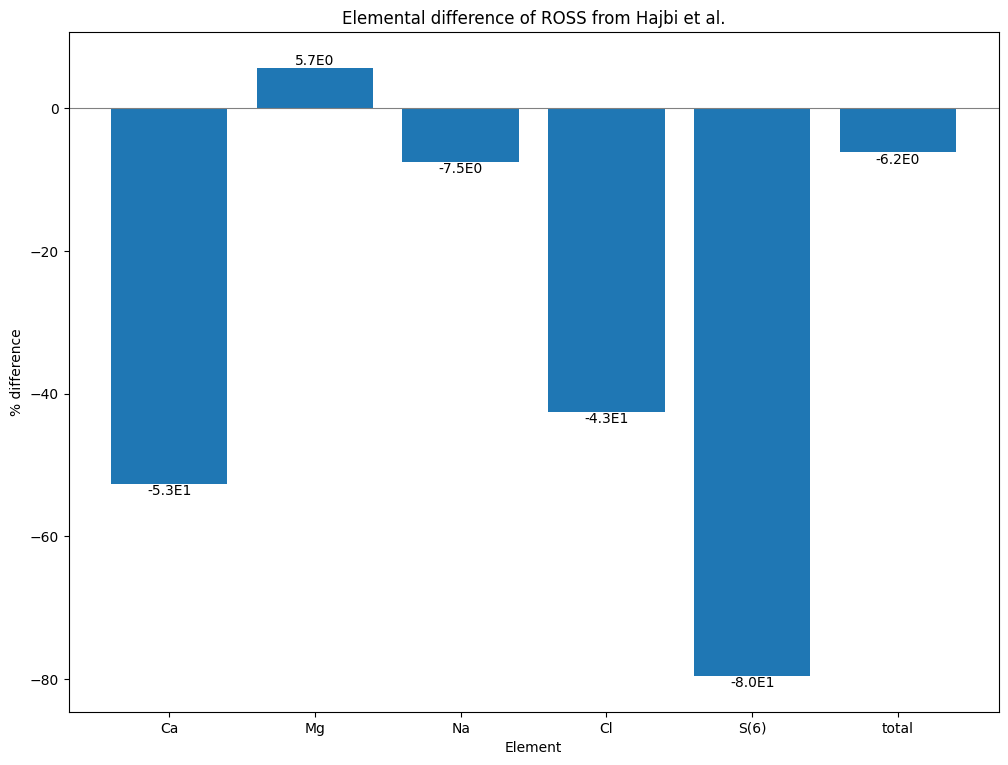

In [6]:
from scipy.constants import nano, milli, day, hour

# run the ROSS model
%run ../../rosspy/core.py
ross = ROSSPkg()

# module parameters
quantity_of_modules = 1
solution_description = 'Hajbi'
module_characteristics = {        
    'permeate_flow_m3_per_day': 1200 / quantity_of_modules,
    'max_feed_flow_m3_per_hour': 1848 / (day/hour),
}

# water parameters
custom_water_parameters = {
    'element': {
        'Ca': {
            'concentration (ppm)':720,
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':335,
            'reference':''
        },
        'Na': {
            'concentration (ppm)':1950,
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':13,
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':3550,
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':2250,
            'reference':''
        },
        'Fe': {
            'concentration (ppm)':0.2,
            'reference':''
        }
    }
}

# general parameters
database_selection = 'pitzer'
simulation_title = 'test'
simulation = 'brine'
water_selection = ''
simulation_perspective = 'all_distance'
simulation_time = 75

# create the input file
ross.define_general(database_selection, simulation, quantity_of_modules = quantity_of_modules)
ross.transport(simulation_time, simulation_perspective, module_characteristics, )
ross.reaction()
ross.solutions(water_selection, custom_water_parameters, solution_description)
ross.equilibrium_phases()
ross.selected_output()
ross.export()

# execute the input file
raw_data3 = ross.execute()
single_module_data2 = ross.process_selected_output()

# process and export the data
export_path = os.path.join(ross.simulation_path, 'Hajbi_comparison.png')
compare_brine_concentrations(single_module_data2, raw_data3, export_path)